In [1]:
#Create psuedo code outline for this project.
#for EDA part will need to include visuals.
# will need to import everything: pandas, numpy, matplotlib, statsmodels, seaborn,.
# in initial EDA should include: info(), head(), shape, describe(), count nulls, review uniques in certain cases.
#potentially convvert data types of certain columns.
# should also include a histogram or two.

In [2]:
#OSEMN FRAMEWORK:
# Obtain - from another location extract and generate data.
# Scrub - filtering lines, extracting columns, replacing values, handling missing values, converting formats.
# Explore - understand data, deriving statistics, creating visualization.
# Model - clustering, classification, regression, dimensionality reduction.
# Interpret - drwaing conclusions from data, evaluate meaning of results, communicating result.

#Approach to the project through this framework is as follows:
#import was relatively simple as the file is in the notebook directly.  Once the file is imported and all necessary
#packages are imported (pandas, numpy, statsmodels, scikitlearn, matplotlib) then EDA begins with an exam for
#correct data types, null and missing values.  After this review and creating some visualizations to properly diagnose
#the data set, then next a model will need to be created for the prediction of the future pricing of these houses.
#Log transforming some variables and using RFE to narrow down feature selection comes next.
#Then, actual multiple linear regression models will be created to measure predictions for the prices of these houses.

In [ ]:
# APPROACH TO THE PROJECT THROUGH THE OSEMN FRAMEWORK:
#This project poses an interesting mix of data to use in order to find good predictors for the price of a house in this
#market.  Fill in the actual definition of the OSEMN framework.
#The actual obtaining of the data was quite straightforward - import was direct since it was already in the notebook.
#data types were relatively straightforward with only 2 columns being "object" data type and needing to be converted
#they were: the date column and the sqft_basement column.  The date column was converted to the date/time data type and
#Month and Day_of_week columns were also added.  The sqft_basement column was converted to a float64 data type.
#The filtering of lines, extracting of columns and handling of missing values section centered mainly around null values
#for only 3 columns: waterfront, view and yr_renovated.  Each part of null values were addressed.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels as sm
from statsmodels.formula.api import ols
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.yr_renovated.unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [4]:
df.yr_renovated.value_counts(normalize=True)

0.0       0.958096
2014.0    0.004112
2003.0    0.001746
2013.0    0.001746
2007.0    0.001690
2000.0    0.001633
2005.0    0.001633
1990.0    0.001239
2004.0    0.001239
2009.0    0.001183
1989.0    0.001126
2006.0    0.001126
2002.0    0.000957
1991.0    0.000901
1998.0    0.000901
1984.0    0.000901
1999.0    0.000845
2008.0    0.000845
2010.0    0.000845
2001.0    0.000845
1983.0    0.000845
2015.0    0.000789
1985.0    0.000789
1986.0    0.000789
1987.0    0.000789
1994.0    0.000789
1992.0    0.000732
1993.0    0.000676
1997.0    0.000676
1995.0    0.000676
            ...   
1975.0    0.000282
1964.0    0.000282
1969.0    0.000225
1963.0    0.000225
1973.0    0.000225
1981.0    0.000225
1965.0    0.000225
1978.0    0.000169
1960.0    0.000169
1958.0    0.000169
1956.0    0.000169
1955.0    0.000169
1945.0    0.000169
1972.0    0.000169
1967.0    0.000113
1957.0    0.000113
1940.0    0.000113
1974.0    0.000113
1962.0    0.000113
1953.0    0.000056
1950.0    0.000056
1934.0    0.

In [5]:
df.sqft_basement.unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [6]:
df['yr_renovated_update'] = np.where(df['yr_renovated'] == 0, 0, 1)

In [7]:
df.yr_renovated_update

0        0
1        1
2        1
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       1
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       1
24       0
25       0
26       1
27       0
28       1
29       0
        ..
21567    0
21568    0
21569    0
21570    0
21571    0
21572    0
21573    0
21574    0
21575    1
21576    1
21577    1
21578    0
21579    1
21580    0
21581    1
21582    0
21583    1
21584    0
21585    0
21586    0
21587    0
21588    0
21589    0
21590    0
21591    0
21592    0
21593    0
21594    0
21595    0
21596    0
Name: yr_renovated_update, Length: 21597, dtype: int32

In [8]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_renovated_update
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,1
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0


In [9]:
df.yr_renovated.value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2008.0       15
2010.0       15
2001.0       15
1983.0       15
2015.0       14
1985.0       14
1986.0       14
1987.0       14
1994.0       14
1992.0       13
1993.0       12
1997.0       12
1995.0       12
          ...  
1975.0        5
1964.0        5
1969.0        4
1963.0        4
1973.0        4
1981.0        4
1965.0        4
1978.0        3
1960.0        3
1958.0        3
1956.0        3
1955.0        3
1945.0        3
1972.0        3
1967.0        2
1957.0        2
1940.0        2
1974.0        2
1962.0        2
1953.0        1
1950.0        1
1934.0        1
1944.0        1
1976.0        1
1948.0        1
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Leng

In [10]:
df.shape

(21597, 22)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
id                     21597 non-null int64
date                   21597 non-null object
price                  21597 non-null float64
bedrooms               21597 non-null int64
bathrooms              21597 non-null float64
sqft_living            21597 non-null int64
sqft_lot               21597 non-null int64
floors                 21597 non-null float64
waterfront             19221 non-null float64
view                   21534 non-null float64
condition              21597 non-null int64
grade                  21597 non-null int64
sqft_above             21597 non-null int64
sqft_basement          21597 non-null object
yr_built               21597 non-null int64
yr_renovated           17755 non-null float64
zipcode                21597 non-null int64
lat                    21597 non-null float64
long                   21597 non-null float64
sqft_living15          21597 non-null

In [12]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_renovated_update
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,0.212344
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950,0.408977
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,0.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,0.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,0.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,1.000000


DROPPING BEDROOMS:

In [13]:
df[df['bedrooms']==33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_renovated_update
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700,0


In [14]:
df.drop(df.index[15856], inplace=True)

In [15]:
df[df['bedrooms']>=7]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_renovated_update
556,5486800070,6/20/2014,1950000.0,7,3.50,4640,15235,2.0,NaN,1.0,...,2860,1780.0,1965,2003.0,98040,47.5666,-122.231,3230,20697,1
1134,4024100951,1/5/2015,420000.0,7,3.00,2940,8624,1.0,0.0,0.0,...,1690,1250.0,1977,NaN,98155,47.7555,-122.307,1850,8031,1
1239,7227802030,6/23/2014,350000.0,7,3.00,2800,9569,1.0,0.0,2.0,...,1400,1400.0,1963,0.0,98056,47.5102,-122.183,2150,7333,0
1658,9126101740,12/4/2014,490000.0,8,5.00,2800,2580,2.0,0.0,0.0,...,1880,920.0,1997,0.0,98122,47.6086,-122.303,1800,2580,0
3717,5451100490,1/15/2015,884900.0,7,4.75,5370,10800,1.5,0.0,0.0,...,5370,0.0,1967,0.0,98040,47.5380,-122.223,2310,10910,0
4020,9175600025,10/7/2014,800000.0,7,6.75,7480,41664,2.0,0.0,2.0,...,5080,2400.0,1953,NaN,98166,47.4643,-122.368,2810,33190,1
4031,685000115,10/7/2014,2150000.0,8,6.00,4340,9415,2.0,0.0,0.0,...,4340,0.0,1967,0.0,98004,47.6316,-122.202,2050,9100,0
4063,7226500100,2/19/2015,373000.0,8,3.00,2850,12714,1.0,NaN,0.0,...,2850,0.0,1959,0.0,98055,47.4859,-122.205,1480,4942,0
4092,1997200215,5/7/2014,599999.0,9,4.50,3830,6988,2.5,0.0,0.0,...,2450,1380.0,1938,0.0,98103,47.6927,-122.338,1460,6291,0
4231,2902200015,1/6/2015,700000.0,9,3.00,3680,4400,2.0,0.0,0.0,...,2830,850.0,1908,0.0,98102,47.6374,-122.324,1960,2450,0


In [16]:
df = df[df['bedrooms'] <7]
df.shape

(21535, 22)

In [17]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_renovated_update
count,2.153500e+04,2.153500e+04,21535.000000,21535.000000,21535.000000,2.153500e+04,21535.000000,19164.000000,21472.000000,21535.000000,21535.000000,21535.000000,21535.000000,17707.000000,21535.000000,21535.000000,21535.000000,21535.000000,21535.000000,21535.000000
mean,4.581314e+09,5.390889e+05,3.359786,2.111400,2075.221779,1.509742e+04,1.493360,0.007618,0.233420,3.409705,7.656280,1785.243836,1971.039053,83.185012,98077.929557,47.559926,-122.213864,1985.835663,12759.793220,0.212027
std,2.876958e+09,3.652086e+05,0.875090,0.762291,909.693683,4.142101e+04,0.539494,0.086953,0.765083,0.650431,1.171862,823.245932,29.359903,398.906548,53.523854,0.138642,0.140803,684.596314,27274.117437,0.408753
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000
25%,2.123049e+09,3.210000e+05,3.000000,1.750000,1420.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.470400,-122.328000,1490.000000,5100.000000,0.000000
50%,3.904931e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.615000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7620.000000,0.000000
75%,7.312150e+09,6.430000e+05,4.000000,2.500000,2540.000000,1.066750e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10081.500000,0.000000
max,9.900000e+09,7.700000e+06,6.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8860.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,1.000000


In [18]:
df.shape

(21535, 22)

In [19]:
df.bedrooms.unique()

array([3, 2, 4, 5, 1, 6], dtype=int64)

In [20]:
df.bedrooms.value_counts()

3    9824
4    6882
2    2760
5    1601
6     272
1     196
Name: bedrooms, dtype: int64

In [21]:
df['condition'].unique()

array([3, 5, 4, 1, 2], dtype=int64)

In [22]:
df['condition'].value_counts(normalize=True)

3    0.649129
4    0.262967
5    0.078663
2    0.007894
1    0.001347
Name: condition, dtype: float64

In [ ]:
#considerations:
#date - convert that using "astype"?  convert to pandas date/time - can pull out month variable or day of week
#feature engineering is preferred - the actual adding of a column.  common to save a different copy of the data-in work world
# good to dive in with other column additions.
#bedrooms - will remove the 33 bedroom house as this is clearly an outlier.  Also decided to remove houses with
#7 or more bedrooms as these are clearly outliers.
#waterfront - missing values, likely nulls, will need to be replaced.  not necessarily a right answer - could drop
# could take a median or mean.  could fill it with the mode - do value counts on waterfront - if missing then is a waterfront
# if waterfront missing and group by latitude/longitude and see if near neighbor then make it waterfront.
#view - small amount of missing values, could be nulls.
#sqft_basement - needs to be converted from object to integer.  proabably some string values in here - deal with ''?''
#yr_renovated - some missing values.  need to deal with nulls. converted nulls to zeros.
#likely categorical data.  make binary column?? reno or not?
# drop yr_renovated when i do the regression.  when using rfe for feature selection (or p-values) not perfect for selection
#so need to be careful with what columns are in the table.  don't want regression model to be based off of random events.
# need to ask 3 questions and do that in the explore stage - could be explained through a single graph.
#EDA: date convert - done. waterfront-waiting for Jeff reply. View - done. Sqft_basement - done.

Visualizations & EDA<br/>
Your project contains at least 4 meaningful data visualizations, with corresponding interpretations. All visualizations are well labeled with axes labels, a title, and a legend (when appropriate)<br/>
You pose at least 3 meaningful questions and aswer them through EDA. These questions should be well labled and easy to identify inside the notebook.<br/>
Level Up: Each question is clearly answered with a visualization that makes the answer easy to understand.
Your notebook should contain 1 - 2 paragraphs briefly explaining your approach to this project through the OSEMN framework.

In [ ]:
#what 3 questions can the I answer during the EDA stage that will be graphically represented?
# 1) As the number of bedrooms increases does the price increase? 
#Visual: create a histogram for the amount of bedrooms in each house.
# 2) As the square footage of a house increases does the price of a house increase?
#Visual: create a scatter plot showing the relationship between price and number of bedrooms.
# 3) Is there a relationship between the square footage of the nearest 15 neighbors and the price of a house?
#Visual: create a scatter plot showing the relationship between price a nd nearest 15 houses square footage.

In [23]:
df['date'].dtypes

dtype('O')

In [24]:
df['date'] = pd.to_datetime(df['date'])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21535 entries, 0 to 21596
Data columns (total 22 columns):
id                     21535 non-null int64
date                   21535 non-null datetime64[ns]
price                  21535 non-null float64
bedrooms               21535 non-null int64
bathrooms              21535 non-null float64
sqft_living            21535 non-null int64
sqft_lot               21535 non-null int64
floors                 21535 non-null float64
waterfront             19164 non-null float64
view                   21472 non-null float64
condition              21535 non-null int64
grade                  21535 non-null int64
sqft_above             21535 non-null int64
sqft_basement          21535 non-null object
yr_built               21535 non-null int64
yr_renovated           17707 non-null float64
zipcode                21535 non-null int64
lat                    21535 non-null float64
long                   21535 non-null float64
sqft_living15          21535 

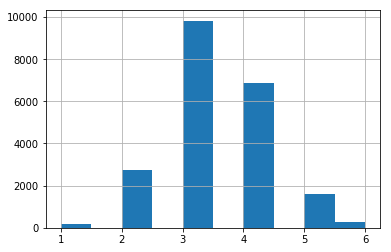

In [26]:
df.bedrooms.hist()

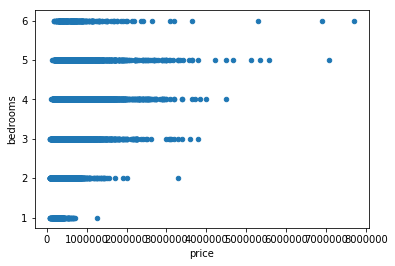

In [27]:
df.plot.scatter('price', 'bedrooms')

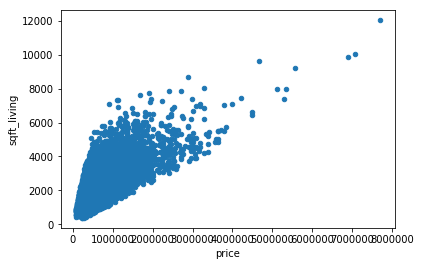

In [28]:
df.plot.scatter('price', 'sqft_living')

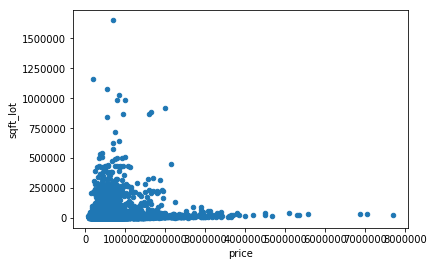

In [29]:
df.plot.scatter('price', 'sqft_lot')

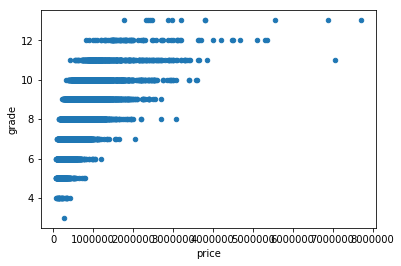

In [30]:
df.plot.scatter('price', 'grade')

In [31]:
df['grade'].value_counts()

7     8949
8     6048
9     2609
6     2037
10    1128
11     394
5      242
12      87
4       27
13      13
3        1
Name: grade, dtype: int64

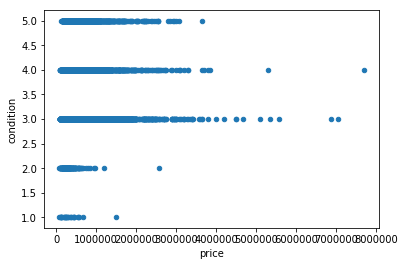

In [32]:
df.plot.scatter('price', 'condition')

In [33]:
df['yr_renovated'].isna().sum()

3828

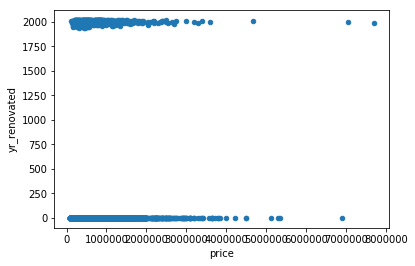

In [34]:
df.plot.scatter('price', 'yr_renovated')

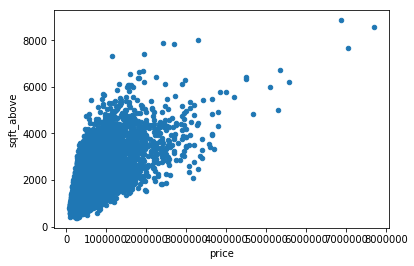

In [35]:
df.plot.scatter('price', 'sqft_above')

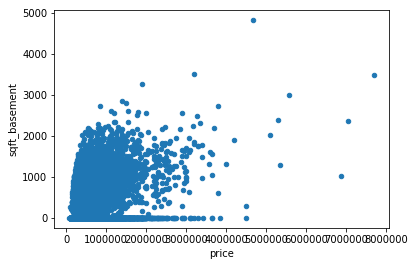

In [78]:
df.plot.scatter('price', 'sqft_basement')

In [37]:
df['Month'] = df['date'].dt.month
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_renovated_update,Month
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0,10
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1,12
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,1,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0,12
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0,2


In [38]:
df['Day_of_Week'] = df['date'].dt.dayofweek
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_renovated_update,Month,Day_of_Week
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1955,0.0,98178,47.5112,-122.257,1340,5650,0,10,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,1,12,1
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,1933,NaN,98028,47.7379,-122.233,2720,8062,1,2,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1965,0.0,98136,47.5208,-122.393,1360,5000,0,12,1
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1987,0.0,98074,47.6168,-122.045,1800,7503,0,2,2


In [39]:
df[['date','Day_of_Week']].head()

,date,Day_of_Week
0,2014-10-13,0
1,2014-12-09,1
2,2015-02-25,2
3,2014-12-09,1
4,2015-02-18,2


In [40]:
df['waterfront'].value_counts()

0.0    19018
1.0      146
Name: waterfront, dtype: int64

In [41]:
df['waterfront'].unique()

array([nan,  0.,  1.])

In [43]:
df.groupby('waterfront')['zipcode'].value_counts()

waterfront  zipcode
0.0         98103      537
            98038      528
            98115      514
            98052      503
            98117      492
            98042      486
            98034      478
            98023      444
            98118      442
            98006      432
            98133      427
            98059      405
            98058      395
            98155      391
            98074      375
            98033      372
            98027      368
            98056      362
            98053      361
            98125      357
            98001      328
            98075      319
            98126      312
            98092      309
            98144      299
            98106      297
            98116      297
            98029      293
            98065      279
            98004      278
                      ... 
            98039       43
1.0         98070       20
            98166       14
            98040       11
            98008        9
        

In [44]:
df.groupby('zipcode')['waterfront'].value_counts()

zipcode  waterfront
98001    0.0           328
98002    0.0           179
98003    0.0           255
98004    0.0           278
         1.0             1
98005    0.0           158
98006    0.0           432
         1.0             4
98007    0.0           118
98008    0.0           246
         1.0             9
98010    0.0            87
98011    0.0           175
98014    0.0           110
98019    0.0           167
98022    0.0           209
98023    0.0           444
         1.0             3
98024    0.0            73
98027    0.0           368
         1.0             2
98028    0.0           254
         1.0             1
98029    0.0           293
98030    0.0           235
98031    0.0           244
98032    0.0           115
98033    0.0           372
         1.0             3
98034    0.0           478
                      ... 
98117    0.0           492
98118    0.0           442
         1.0             3
98119    0.0           165
98122    0.0           259
98125   

In [ ]:
#There appears to be over 2,000 homes in the waterfront column that are nulls.  Some of these null values in this column reside
#in zip codes that have waterfront and non-waterfront houses.  Since unable to determine which are which, there will now
#be a third category in the waterfront column (2) that will denote "unknown" if waterfront property.  Will now convert those
#nulls to the value of "2" in the waterfront column.

In [45]:
df.waterfront.unique()

array([nan,  0.,  1.])

In [46]:
df['waterfront'].fillna(2, inplace=True)
df['waterfront'].unique()

array([2., 0., 1.])

In [47]:
df.waterfront.unique()

array([2., 0., 1.])

In [48]:
df.isna().sum()

id                        0
date                      0
price                     0
bedrooms                  0
bathrooms                 0
sqft_living               0
sqft_lot                  0
floors                    0
waterfront                0
view                     63
condition                 0
grade                     0
sqft_above                0
sqft_basement             0
yr_built                  0
yr_renovated           3828
zipcode                   0
lat                       0
long                      0
sqft_living15             0
sqft_lot15                0
yr_renovated_update       0
Month                     0
Day_of_Week               0
dtype: int64

#WORKING ON THE VIEW COLUMN

In [49]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_renovated_update,Month,Day_of_Week
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,2.0,0.0,...,1955,0.0,98178,47.5112,-122.257,1340,5650,0,10,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,1,12,1
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,1933,NaN,98028,47.7379,-122.233,2720,8062,1,2,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1965,0.0,98136,47.5208,-122.393,1360,5000,0,12,1
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1987,0.0,98074,47.6168,-122.045,1800,7503,0,2,2


In [50]:
df.view.unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [51]:
df.view.isna().sum()

63

In [52]:
df.view.value_counts()

0.0    19371
2.0      952
3.0      507
1.0      327
4.0      315
Name: view, dtype: int64

In [53]:
df.view.value_counts(normalize=True)

0.0    0.902152
2.0    0.044337
3.0    0.023612
1.0    0.015229
4.0    0.014670
Name: view, dtype: float64

It looks like 63 houses out of 21,000 have an unknown amount of views.  90.19% of houses have not been viewed.  Decision is that since less than 10% of total houses have been viewed this likely is not a critical factor.  The nulls in this column will be converted into the "zero" view value.

In [54]:
df['view'].fillna(0)
df['view'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: view, dtype: float64

In [55]:
df.view.isna().sum()

63

In [56]:
df.view.value_counts()

0.0    19371
2.0      952
3.0      507
1.0      327
4.0      315
Name: view, dtype: int64

In [57]:
df.view.unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [58]:
df['view'].fillna(0, inplace=True)
df['view'].unique()

array([0., 3., 4., 2., 1.])

In [59]:
df.view.value_counts()

0.0    19434
2.0      952
3.0      507
1.0      327
4.0      315
Name: view, dtype: int64

ADDRESSING SQFT_BASEMENT COLUMN:

In [60]:
df.sqft_basement.unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [63]:
df.sqft_basement.value_counts()

0.0       12807
?           452
600.0       214
500.0       209
700.0       208
800.0       200
400.0       184
1000.0      147
900.0       142
300.0       142
200.0       105
530.0       103
450.0       103
480.0       103
750.0       103
720.0        98
620.0        90
840.0        83
580.0        83
420.0        81
860.0        79
670.0        78
1100.0       77
780.0        76
550.0        76
650.0        75
240.0        74
380.0        73
680.0        73
360.0        72
          ...  
2196.0        1
1275.0        1
915.0         1
2390.0        1
652.0         1
588.0         1
1770.0        1
1880.0        1
2850.0        1
143.0         1
1960.0        1
666.0         1
374.0         1
276.0         1
2300.0        1
602.0         1
475.0         1
3260.0        1
1920.0        1
3000.0        1
1816.0        1
2360.0        1
1990.0        1
2180.0        1
207.0         1
1135.0        1
2090.0        1
1245.0        1
172.0         1
704.0         1
Name: sqft_basement, Len

There are 454 rows with the '?' value in the sqft_basement column - this is 2.1% of the total.  Additionally, there are over 12,800 rows with a zero value in the sqft_basement column which is 59.39% of the total.  It is appropriate to convert the '?' values to a zero value, as well.  Will do this using a "where" statement.

In [64]:
df['sqft_basement'].replace('?', 0, inplace=True)
df['sqft_basement'].value_counts()

0.0       12807
0           452
600.0       214
500.0       209
700.0       208
800.0       200
400.0       184
1000.0      147
900.0       142
300.0       142
200.0       105
480.0       103
750.0       103
530.0       103
450.0       103
720.0        98
620.0        90
840.0        83
580.0        83
420.0        81
860.0        79
670.0        78
1100.0       77
780.0        76
550.0        76
650.0        75
240.0        74
380.0        73
680.0        73
360.0        72
          ...  
862.0         1
1275.0        1
2050.0        1
2610.0        1
2390.0        1
475.0         1
2250.0        1
1548.0        1
2360.0        1
1920.0        1
935.0         1
1816.0        1
20.0          1
1481.0        1
3000.0        1
602.0         1
295.0         1
176.0         1
248.0         1
2190.0        1
588.0         1
2730.0        1
2570.0        1
875.0         1
1248.0        1
2600.0        1
225.0         1
3480.0        1
2310.0        1
2130.0        1
Name: sqft_basement, Len

In [65]:
df.sqft_basement.value_counts().head()

0.0      12807
0          452
600.0      214
500.0      209
700.0      208
Name: sqft_basement, dtype: int64

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21535 entries, 0 to 21596
Data columns (total 24 columns):
id                     21535 non-null int64
date                   21535 non-null datetime64[ns]
price                  21535 non-null float64
bedrooms               21535 non-null int64
bathrooms              21535 non-null float64
sqft_living            21535 non-null int64
sqft_lot               21535 non-null int64
floors                 21535 non-null float64
waterfront             21535 non-null float64
view                   21535 non-null float64
condition              21535 non-null int64
grade                  21535 non-null int64
sqft_above             21535 non-null int64
sqft_basement          21535 non-null object
yr_built               21535 non-null int64
yr_renovated           17707 non-null float64
zipcode                21535 non-null int64
lat                    21535 non-null float64
long                   21535 non-null float64
sqft_living15          21535 

In [67]:
df['sqft_basement'].dtypes

dtype('O')

In [68]:
df['sqft_basement'] = df['sqft_basement'].astype('float64')

In [69]:
df['sqft_basement'].dtypes

dtype('float64')

In [70]:
df['sqft_basement'].head()

0      0.0
1    400.0
2      0.0
3    910.0
4      0.0
Name: sqft_basement, dtype: float64

ADDRESSING THE YR_RENOVATED COLUMN:

In [71]:
df['yr_renovated'].isna().sum()

3828

In [72]:
df['yr_renovated'].unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [73]:
df['yr_renovated'].value_counts().head()

0.0       16969
2014.0       73
2007.0       30
2003.0       30
2013.0       30
Name: yr_renovated, dtype: int64

Safe assumption that since the majority of the "yr_renovated" column is zero (meaning the house has not been
renovated) then replacing the nulls with a zero value makes sense since it will have little impact.

In [74]:
df['yr_renovated'].fillna(0, inplace=True)
df['yr_renovated'].unique()

array([   0., 1991., 2002., 2010., 1992., 2013., 1994., 1978., 2005.,
       2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990., 1988.,
       1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989., 2004.,
       1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971., 1979.,
       1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008., 1968.,
       2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955., 1982.,
       1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957., 1959.,
       1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [75]:
df['yr_renovated'].value_counts().head()

0.0       20797
2014.0       73
2007.0       30
2003.0       30
2013.0       30
Name: yr_renovated, dtype: int64

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21535 entries, 0 to 21596
Data columns (total 24 columns):
id                     21535 non-null int64
date                   21535 non-null datetime64[ns]
price                  21535 non-null float64
bedrooms               21535 non-null int64
bathrooms              21535 non-null float64
sqft_living            21535 non-null int64
sqft_lot               21535 non-null int64
floors                 21535 non-null float64
waterfront             21535 non-null float64
view                   21535 non-null float64
condition              21535 non-null int64
grade                  21535 non-null int64
sqft_above             21535 non-null int64
sqft_basement          21535 non-null float64
yr_built               21535 non-null int64
yr_renovated           21535 non-null float64
zipcode                21535 non-null int64
lat                    21535 non-null float64
long                   21535 non-null float64
sqft_living15          21535

In [77]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_renovated_update,Month,Day_of_Week
count,2.153500e+04,2.153500e+04,21535.000000,21535.000000,21535.000000,2.153500e+04,21535.000000,21535.000000,21535.000000,21535.000000,...,21535.000000,21535.000000,21535.000000,21535.000000,21535.000000,21535.000000,21535.000000,21535.000000,21535.000000,21535.000000
mean,4.581314e+09,5.390889e+05,3.359786,2.111400,2075.221779,1.509742e+04,1.493360,0.226979,0.232737,3.409705,...,1971.039053,68.398282,98077.929557,47.559926,-122.213864,1985.835663,12759.793220,0.212027,6.572788,2.010448
std,2.876958e+09,3.652086e+05,0.875090,0.762291,909.693683,4.142101e+04,0.539494,0.629029,0.764067,0.650431,...,29.359903,363.112510,53.523854,0.138642,0.140803,684.596314,27274.117437,0.408753,3.115331,1.461093
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000,1.000000,0.000000
25%,2.123049e+09,3.210000e+05,3.000000,1.750000,1420.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,1951.000000,0.000000,98033.000000,47.470400,-122.328000,1490.000000,5100.000000,0.000000,4.000000,1.000000
50%,3.904931e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.615000e+03,1.500000,0.000000,0.000000,3.000000,...,1975.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7620.000000,0.000000,6.000000,2.000000
75%,7.312150e+09,6.430000e+05,4.000000,2.500000,2540.000000,1.066750e+04,2.000000,0.000000,0.000000,4.000000,...,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10081.500000,0.000000,9.000000,3.000000
max,9.900000e+09,7.700000e+06,6.000000,8.000000,12050.000000,1.651359e+06,3.500000,2.000000,4.000000,5.000000,...,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,1.000000,12.000000,6.000000
